In [1]:
import os
import cv2
import sys
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


In [2]:
PROGRAM_PATH = os.path.abspath("..")
if PROGRAM_PATH not in sys.path:
    sys.path.append(PROGRAM_PATH)

In [3]:
from Helpers.GeneralHelpers import *
from Helpers.RHDHelpers import *
from DataHandling.PreProcessing import *
from Model.PoolingAndFire import create_loss_function

In [4]:
MODEL_FILE = os.path.expanduser("~/results/SVPGestureRec/all_points_test.h5py")
#MODEL_FILE = os.path.expanduser("~/results/SqueezeDet/all_points_complete_run_09.h5py")
#MODEL_FILE = os.path.expanduser("~/results/SVPGestureRec/all_points_overfit_32.h5py")
RHD_ANNOTATIONS_FILE = os.path.expanduser("~/datasets/RHD/RHD_published_v2/training/anno_training.pickle")
VALIDATION_DIR = os.path.expanduser("~/datasets/RHD/processed/validation")
TRAIN_DIR = os.path.expanduser("~/datasets/RHD/processed/train")
VALIDATION_ANNOTATIONS = os.path.expanduser("~/datasets/RHD/processed/validation/annotations/")
TRAIN_ANNOTATIONS = os.path.expanduser("~/datasets/RHD/processed/train/annotations/")

In [5]:
create_rhd_annotations(RHD_ANNOTATIONS_FILE,
                       VALIDATION_ANNOTATIONS,
                       VALIDATION_DIR,
                       fingers='ALL',
                       hands_to_annotate='BOTH',
                       annotate_non_visible=False,
                       force_new_files=True)

100%|██████████| 413/413 [00:00<00:00, 4690.18it/s]

Creating annotations in directory: /home/clh/datasets/RHD/processed/validation
Using annotation file: /home/clh/datasets/RHD/RHD_published_v2/training/anno_training.pickle
And outputting to: /home/clh/datasets/RHD/processed/validation/annotations/


In [6]:
BATCHSIZE = 16
EPSILON = 1e-16

LABEL_WEIGHT = 1.0
OFFSET_LOSS_WEIGHT = 1.0
OFFSET_SCALE = int(320 / 20)

NUM_CLASSES = 42
NUM_HANDS = 2

l = create_loss_function(20,
                         20,
                         LABEL_WEIGHT,
                         OFFSET_SCALE,
                         OFFSET_LOSS_WEIGHT,
                         NUM_CLASSES,
                         EPSILON,
                         BATCHSIZE)

In [7]:
model = load_model(MODEL_FILE, custom_objects={'loss_function': l})

In [8]:
samples_dir = VALIDATION_DIR
annotations_dir = VALIDATION_ANNOTATIONS
NUM_SAMPLES_TO_CHECK = BATCHSIZE

In [9]:
#samples_to_check = []
#for fi in os.listdir(samples_dir):
#    if fi.endswith('png'):
#        samples_to_check.append(int(fi.split('.')[0]))
#        if len(samples_to_check) >= NUM_SAMPLES_TO_CHECK:
#            break

#print(samples_to_check)

In [10]:
samples = np.array(get_all_samples(samples_dir, sample_type='png'))
ind = np.random.randint(0, len(samples), size=NUM_SAMPLES_TO_CHECK)
samples_to_check = samples[ind]
print(samples_to_check)

[40903 41106 41074 41208 40947 41037 41243 41052 41097 41206 41255 41185
 40852 41184 40853 40941]


In [11]:
labels, images = load_data_with_anchors(samples_to_check,
                                        samples_dir,
                                        annotations_dir,
                                        320, 320,
                                        20, 20,
                                        OFFSET_SCALE,
                                        'png',
                                        num_classes=NUM_CLASSES,
                                        greyscale=True)

images_show = np.zeros((len(images), 320, 320, 3), dtype=np.uint8)
#for c, im in enumerate(images):
#    #images_show[c] = cv2.cvtColor((im * 255.0).astype(np.uint8), cv2.COLOR_BGR2RGB)
#    images_show[c][:, :, 0] = im.reshape(320, 320) * 255.0
#    images_show[c][:, :, 1] = im.reshape(320, 320) * 255.0
#    images_show[c][:, :, 2] = im.reshape(320, 320) * 255.0

for c, s in enumerate(samples_to_check):
    images_show[c] = load_image(samples_dir, s)

print(np.max(images[0]))

5.898096084594727


In [12]:
for l in labels:
    print(l.shape)
    for i in range(NUM_CLASSES):
        offset_xs = l[:, :, NUM_CLASSES+i*2]
        offset_ys = l[:, :, NUM_CLASSES+1+i*2]
        
        print(f"Offset max x: {np.max(offset_xs)}")
        print(f"Offset max y: {np.max(offset_ys)}")
        print("")

(20, 20, 126)
Offset max x: 0.4250001907348633
Offset max y: 0.19999980926513672

Offset max x: 0.3312501907348633
Offset max y: 0.4562501907348633

Offset max x: 0.14375019073486328
Offset max y: 0.9125003814697266

Offset max x: 0.46875
Offset max y: 0.8812503814697266

Offset max x: 0.05624961853027344
Offset max y: 0.13749980926513672

Offset max x: 0.90625
Offset max y: 0.6937503814697266

Offset max x: 0.40625
Offset max y: 0.3249998092651367

Offset max x: 0.9375
Offset max y: 0.11874961853027344

Offset max x: 0.35000038146972656
Offset max y: 0.7124996185302734

Offset max x: 0.25625038146972656
Offset max y: 0.2687501907348633

Offset max x: 0.9250001907348633
Offset max y: 0.8999996185302734

Offset max x: 0.8062496185302734
Offset max y: 0.7624998092651367

Offset max x: 0.18124961853027344
Offset max y: 0.5749998092651367

Offset max x: 0.5124998092651367
Offset max y: 0.6687498092651367

Offset max x: 0.4375
Offset max y: 0.25

Offset max x: 0.5625
Offset max y: 0.0437498

Offset max y: 0.8937501907348633

Offset max x: 0.9487500190734863
Offset max y: 0.13125038146972656

Offset max x: 0.07625007629394531
Offset max y: 0.3000001907348633

Offset max x: 0.15374994277954102
Offset max y: 0.08749961853027344

Offset max x: 0.06750011444091797
Offset max y: 0.3625001907348633

Offset max x: 0.9118747711181641
Offset max y: 0.6125001907348633

Offset max x: 0.27437496185302734
Offset max y: 0.8062496185302734

Offset max x: 0.3918747901916504
Offset max y: 0.6437501907348633

Offset max x: 0.07937479019165039
Offset max y: 0.10000038146972656

Offset max x: 0.12125015258789062
Offset max y: 0.2687501907348633

Offset max x: 0.8193750381469727
Offset max y: 0.43124961853027344

Offset max x: 0.796875
Offset max y: 0.3000001907348633

Offset max x: 0.90625
Offset max y: 0.53125

Offset max x: 0.08125019073486328
Offset max y: 0.6062498092651367

Offset max x: 0.0625
Offset max y: 0.5749998092651367

Offset max x: 0.6875
Offset max y: 0.33750009536743164

Offse

In [13]:
right_hand = []
left_hand = []

with open(RHD_ANNOTATIONS_FILE, 'rb') as f:
    annotations = pickle.load(f)
    
for s in samples_to_check:
    right_hand.append(get_right_hand(s, annotations))
    left_hand.append(get_left_hand(s, annotations))

In [14]:
res = np.zeros(labels.shape)
process_times = []
for c, im in enumerate(images):
    before = time.time()
    #res.append(model.predict(im.reshape(1, 320, 320, 1)))
    res[c] = model.predict(im.reshape(1, 320, 320, 1))
    process_times.append(time.time() - before)
    
process_times = np.array(process_times)
print(f"Average processing time: {np.mean(process_times)}")
print(f"Max processing time: {np.max(process_times)}")
print(f"Min processing time: {np.min(process_times)}")
print(f"Average processing time excepting first: {np.mean(process_times[1:])}")

Average processing time: 0.11222617328166962
Max processing time: 1.534796953201294
Min processing time: 0.016711711883544922
Average processing time excepting first: 0.017388121287027995


In [15]:
for c, l in enumerate(labels):
    for i in range(NUM_CLASSES):
        finger_index = i
        if finger_index >= 21:
            finger_index -= 21
        
        single_label = np.zeros((20, 20, 3))
        single_label[:, :, 0] = labels[c, :, :, i]
        single_label[:, :, 1] = labels[c, :, :, NUM_CLASSES+i*2]
        single_label[:, :, 2] = labels[c, :, :, NUM_CLASSES+1+i*2]
        
        anchors = get_anchors(320, 320, 20, 20)

        label_points = get_all_points_from_prediction(single_label,
                                                      anchors,
                                                      threshold=1.0,
                                                      offset_weight=OFFSET_SCALE)
        
        x_points = np.zeros(len(label_points))
        y_points = np.zeros(len(label_points))
        for counter, p in enumerate(label_points):
            #x = p[0] + p[2]
            #y = p[1] + p[3]
            x_points[counter] = p[0] + p[2]
            y_points[counter] = p[1] + p[2]
        
        if len(label_points) > 0:
            x = np.mean(x_points)
            y = np.mean(y_points)

            print(f"{FINGER_MAP_INV[finger_index]}: ({x:.2f}, {y:.2f}), anchor point: ({p[0]:.2f}, {p[1]:.2f}), offset: ({p[2]:.2f}, {p[3]:.2f}), number: {len(label_points)}")

            cv2.circle(images_show[c], (int(x), int(y)), 1, (0, 255, 0), thickness=2)

Wrist: (158.80, 189.30), anchor point: (167.00, 198.00), offset: (-8.20, -12.80), number: 4
Thumb1: (187.30, 202.80), anchor point: (198.00, 213.00), offset: (-10.70, -7.70), number: 4
Thumb2: (184.30, 189.63), anchor point: (198.00, 198.00), offset: (-13.70, -1.40), number: 3
Thumb3: (174.50, 174.50), anchor point: (182.00, 182.00), offset: (-7.50, -0.90), number: 4
Thumb4: (167.90, 183.23), anchor point: (182.00, 182.00), offset: (-14.10, 2.20), number: 3
Index1: (181.50, 197.17), anchor point: (182.00, 198.00), offset: (-0.50, -4.90), number: 3
Index2: (188.50, 204.00), anchor point: (198.00, 213.00), offset: (-9.50, -9.80), number: 4
Index3: (182.00, 223.00), anchor point: (182.00, 228.00), offset: (0.00, -13.10), number: 3
Index4: (157.60, 203.60), anchor point: (167.00, 213.00), offset: (-9.40, -3.60), number: 4
Middle1: (171.10, 202.10), anchor point: (182.00, 213.00), offset: (-10.90, -10.70), number: 4
Middle2: (181.80, 216.55), anchor point: (182.00, 228.00), offset: (-0.20, 

Pinky1: (133.70, 179.20), anchor point: (137.00, 182.00), offset: (-3.30, -6.00), number: 4
Pinky2: (122.30, 167.97), anchor point: (137.00, 167.00), offset: (-14.70, 4.90), number: 3
Pinky3: (111.90, 172.90), anchor point: (121.00, 182.00), offset: (-9.10, -12.10), number: 4
Pinky4: (116.70, 177.70), anchor point: (121.00, 182.00), offset: (-4.30, -3.80), number: 4
Wrist: (152.70, 183.03), anchor point: (167.00, 182.00), offset: (-14.30, 5.70), number: 3
Thumb1: (169.90, 129.57), anchor point: (182.00, 137.00), offset: (-12.10, -1.20), number: 3
Thumb2: (167.20, 144.70), anchor point: (167.00, 152.00), offset: (0.20, -6.40), number: 2
Thumb3: (162.40, 162.40), anchor point: (167.00, 167.00), offset: (-4.60, -9.70), number: 4
Thumb4: (156.10, 171.10), anchor point: (167.00, 182.00), offset: (-10.90, -9.40), number: 4
Index1: (150.90, 150.90), anchor point: (152.00, 152.00), offset: (-1.10, -6.00), number: 3
Index2: (149.60, 153.35), anchor point: (152.00, 167.00), offset: (-2.40, -15.3

Pinky4: (133.60, 143.93), anchor point: (137.00, 152.00), offset: (-3.40, -13.20), number: 3


In [16]:
arr = np.array([0, 1, 2, 3])
np.clip(arr, 0, 1)

array([0, 1, 1, 1])

In [17]:
THRESHOLD = 0.9

for c, r in enumerate(res):
    #print(r.shape)
    #pred = r.reshape(20, 20, 3)
    
    for i in range(NUM_CLASSES):
        
        finger_index = i
        if finger_index >= 21:
            finger_index -= 21
        
        pred = np.zeros((20, 20, 3))
        
        pred[:, :, 0] = res[c, :, :, i]
        pred[:, :, 1] = res[c, :, :, NUM_CLASSES+i*2]
        pred[:, :, 2] = res[c, :, :, NUM_CLASSES+1+i*2]
        
        #print(np.max(pred[:, :, 0]))
        
        anchors = get_anchors(320, 320, 20, 20)
        max_conf = np.max(pred[:,:,0])
        max_val = 0.9
        pred_point = get_all_points_from_prediction(pred,
                                                    anchors,
                                                    threshold=max_val,
                                                    offset_weight=OFFSET_SCALE,
                                                    is_label=False)
        
        # Find a way to handle outliers
        if len(pred_point) > 0:
            x_points = np.zeros(len(pred_point))
            y_points = np.zeros(len(pred_point))
            for counter, p in enumerate(pred_point):
                #x = p[0] + p[2]
                #y = p[1] + p[3]
                x_points[counter] = p[0] + p[2]
                y_points[counter] = p[1] + p[2]

            x = np.mean(x_points)
            y = np.mean(y_points)

            print(f"{FINGER_MAP_INV[finger_index]}  Predicted point: ({x}, {y}), max confidence: {max_conf}, num: {len(pred_point)}")

            cv2.circle(images_show[c], (int(x), int(y)), 1, (255, 0, 0), thickness=1)

Wrist  Predicted point: (307.9749412536621, 246.9749412536621), max confidence: 0.9536965489387512, num: 1
Thumb1  Predicted point: (296.47860765457153, 227.97860765457153), max confidence: 0.9181522727012634, num: 2
Thumb2  Predicted point: (299.94478607177734, 223.94478607177734), max confidence: 0.9506815671920776, num: 1
Thumb3  Predicted point: (306.8032569885254, 230.8032569885254), max confidence: 0.961244523525238, num: 1
Index2  Predicted point: (284.9125633239746, 238.9125633239746), max confidence: 0.9671382308006287, num: 1
Ring3  Predicted point: (262.4113883972168, 247.4113883972168), max confidence: 0.9908518195152283, num: 1
Pinky2  Predicted point: (265.36096000671387, 257.86096000671387), max confidence: 0.9999604225158691, num: 2
Pinky3  Predicted point: (263.43319511413574, 263.43319511413574), max confidence: 0.998869001865387, num: 1
Ring4  Predicted point: (202.76201820373535, 156.76201820373535), max confidence: 0.9157723784446716, num: 1
Pinky4  Predicted point

In [18]:
def confidence_score(label, prediction, num_classes):
    """
    How often does the model tag the correct anchor.
    """
    error = 0
    for i in range(num_classes):
        l = label[:, :, i]
        p = prediction[:, :, i]
        
        label_x, label_y = np.where(l==1.0)
        try:
            label_point = np.array([label_x[0], label_y[0]])
            print(f"label_point: {label_point}")
        except:
            #print("Error")
            continue

        prediction_x, prediction_y = np.where(p==np.max(p))
        prediction_point = np.array([prediction_x[0], prediction_y[0]])
        
        print(f"prediction_point: {prediction_point}")
        
        label_error = np.linalg.norm(label_point - prediction_point)
        error += label_error
        print(label_error)
        
        print("")
    
    return error

#print(res.shape)
confidence_score(labels[0], res[0], 42)

label_point: [ 9 11]
prediction_point: [ 9 12]
1.0

label_point: [11 12]
prediction_point: [ 4 11]
7.0710678118654755

label_point: [11 11]
prediction_point: [10 12]
1.4142135623730951

label_point: [10 10]
prediction_point: [ 9 12]
2.23606797749979

label_point: [10 11]
prediction_point: [ 9 12]
1.4142135623730951

label_point: [10 12]
prediction_point: [11 14]
2.23606797749979

label_point: [11 12]
prediction_point: [11 13]
1.0

label_point: [10 13]
prediction_point: [ 4 11]
6.324555320336759

label_point: [ 9 12]
prediction_point: [ 9 13]
1.0

label_point: [10 12]
prediction_point: [10 13]
1.0

label_point: [10 13]
prediction_point: [10 14]
1.0

label_point: [10 14]
prediction_point: [ 4 11]
6.708203932499369

label_point: [ 9 13]
prediction_point: [ 9 14]
1.0

label_point: [ 9 12]
prediction_point: [10 13]
1.4142135623730951

label_point: [10 13]
prediction_point: [19 17]
9.848857801796104

label_point: [10 14]
prediction_point: [ 4 11]
6.708203932499369

label_point: [ 9 13]
predi

111.36491287690274

In [19]:
def accuracy():
    pass

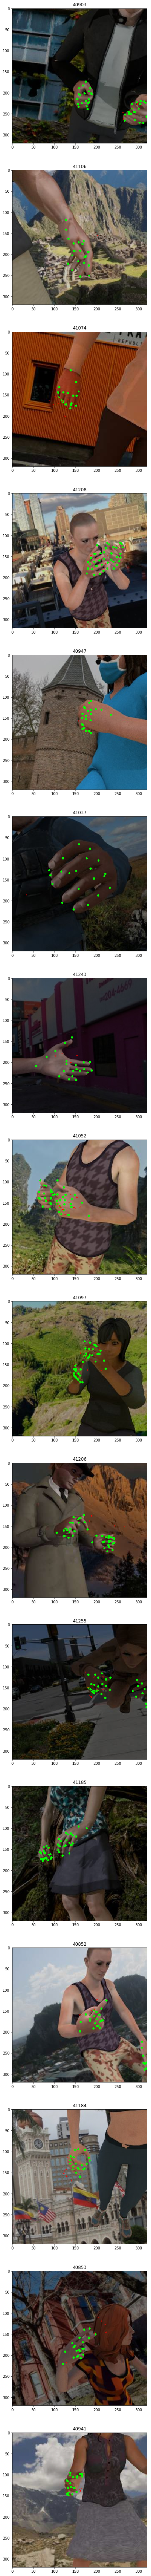

In [20]:
f, subs = plt.subplots(len(images_show), 1, figsize=(15, 8*len(samples_to_check)))
for c, im in enumerate(images_show):
    subs[c].imshow(im)
    #subs[c].set_title(f"Confidence: {np.max(res[c][:,:,:,0])}")
    subs[c].set_title(f"{samples_to_check[c]}")

#f = plt.figure(figsize=(20, 20))
#plt.imshow(images_show[0], cmap='gray')